#  Stocks prediction 

In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Step 1: Reading and analysing the data set

In [3]:
dataframe = pd.read_csv("MSFT.csv")
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [4]:
# Checking the information of the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [5]:
dataframe.shape

(8857, 7)

## Step 2: Data Cleaning

__Data type of "date" column is in object,So have to change this data type__

In [6]:
dataframe["Date"] = pd.DatetimeIndex(dataframe["Date"])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8857 non-null   datetime64[ns]
 1   Open       8857 non-null   float64       
 2   High       8857 non-null   float64       
 3   Low        8857 non-null   float64       
 4   Close      8857 non-null   float64       
 5   Adj Close  8857 non-null   float64       
 6   Volume     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [7]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [8]:
dataframe.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Step 3 EDA

<AxesSubplot:xlabel='Date'>

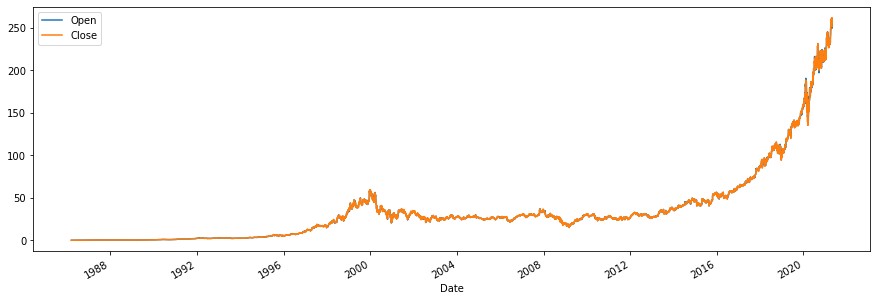

In [9]:
dataframe.plot(x="Date",y=["Open","Close"],figsize=(15,5))

<AxesSubplot:xlabel='Date'>

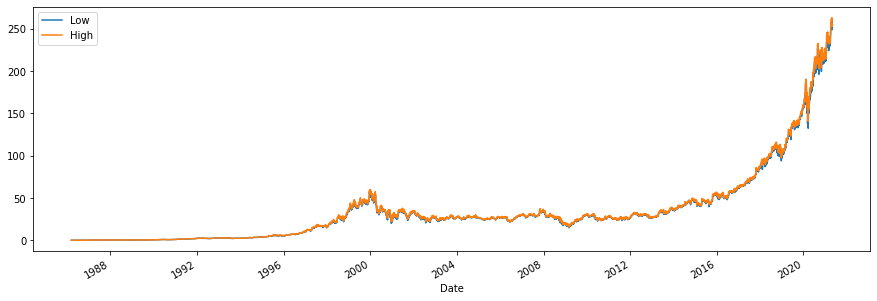

In [10]:
dataframe.plot(x="Date",y=["Low","High"],figsize=(15,5))

In [11]:
dataframe["Day"] = dataframe["Date"].dt.day
dataframe["Month"] = dataframe["Date"].dt.month
dataframe["Year"] = dataframe["Date"].dt.year

In [12]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986


### Finding daily lag

In [13]:
dataframe["Daily lag"] = dataframe['Close'].shift(1)
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Daily lag
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986,0.097222
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986,0.100694
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986,0.102431
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986,0.099826


### Daily Returns

In [14]:
dataframe["Daily Returns"] = (dataframe["Daily lag"]/dataframe["Close"])-1
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Daily lag,Daily Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986,0.097222,-0.034481
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986,0.100694,-0.016958
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986,0.102431,0.026095
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986,0.099826,0.017698


#### Daily returns mean

In [15]:
mean = dataframe["Daily Returns"].mean()
mean

-0.0006542327903949583

### Std

In [16]:
std = dataframe["Daily Returns"].std()
std

0.02171160918684973

# Step 4: Modeling 

In [17]:
X=dataframe[['Day','Month','Year','Open']]
y=dataframe[['Close']]

In [18]:
X.head()

,Day,Month,Year,Open
0,13,3,1986,0.088542
1,14,3,1986,0.097222
2,17,3,1986,0.100694
3,18,3,1986,0.102431
4,19,3,1986,0.099826


In [19]:
X.shape

(8857, 4)

In [20]:
y.head()

,Close
0,0.097222
1,0.100694
2,0.102431
3,0.099826
4,0.098090


In [21]:
y.shape

(8857, 1)

### Train-test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,shuffle=False)

In [24]:
X_train.shape

(6199, 4)

In [25]:
y_train.shape

(6199, 1)

In [26]:
X_test.shape

(2658, 4)

In [27]:
y_test.shape

(2658, 1)

### SVM

In [28]:
from sklearn.svm import SVR

In [29]:
svr_sigmoid = SVR(kernel="sigmoid")
svr_sigmoid.fit(X_train,y_train)

SVR(kernel='sigmoid')

In [30]:
y_pred = svr_sigmoid.predict(X_test)
y_pred

array([19.55753446, 19.55691278, 19.55913447, ..., 20.91524732,
       20.88043905, 20.904754  ])

In [31]:
y_test

,Close
6199,24.590000
6200,24.830000
6201,25.340000
6202,25.230000
6203,25.540001
...,...
8852,261.970001
8853,254.559998
8854,252.509995
8855,252.179993


#### RMSE

In [32]:
from sklearn.metrics import mean_squared_error as mse

In [33]:
error = np.sqrt(mse(y_test,y_pred))
error

81.84025446397845

#### Score

In [34]:
# train score
train_score_sigmoid = svr_sigmoid.score(X_train,y_train)
train_score_sigmoid

-0.03184018085030238

In [35]:
# test score
test_score_sigmoid = svr_sigmoid.score(X_test,y_test)
test_score_sigmoid

-0.9374679932108012

In [36]:
sigmoid_dataframe = pd.DataFrame(index=["RMSE","Train Score","Test Score"],columns=[["Sigmoid"]])
sigmoid_dataframe.loc["RMSE","Sigmoid"]=error
sigmoid_dataframe.loc["Train Score","Sigmoid"] = train_score_sigmoid
sigmoid_dataframe.loc["Test Score"]=test_score_sigmoid
sigmoid_dataframe

,Sigmoid
RMSE,81.8403
Train Score,-0.0318402
Test Score,-0.937468


## <font color=red><i> Sigmoid kernal have not good RMSE and R2 values</i> </font>

### SVM kernel : "poly"

In [37]:
svr_poly = SVR(kernel="poly",degree=8)
svr_poly.fit(X_train,y_train)

SVR(degree=8, kernel='poly')

In [38]:
y_pred_poly = svr_poly.predict(X_test)
y_pred_poly

array([ 26.56533452,  26.48917706,  26.80461845, ..., 236.01635318,
       230.88055479, 234.02495847])

#### RMSE

In [39]:
error_poly = np.sqrt(mse(y_test,y_pred_poly))
error_poly

6.366171283405032

#### Score

In [40]:
# train score
train_score_poly = svr_poly.score(X_train,y_train)
test_score_poly = svr_poly.score(X_test,y_test)

In [41]:
sigmoid_dataframe["Poly"]=[error_poly,train_score_poly,test_score_poly]

In [42]:
sigmoid_dataframe

,Sigmoid,Poly
RMSE,81.8403,6.366171
Train Score,-0.0318402,0.985159
Test Score,-0.937468,0.988277


## SVM kernel : "linear"

In [43]:
svr_linear = SVR(kernel="linear",degree=8)
svr_linear.fit(X_train,y_train)

# prediction
y_pred_linear = svr_sigmoid.predict(X_test)

# RMSE
error_linear = np.sqrt(mse(y_test,y_pred_linear))

# train score
train_score_linear = svr_linear.score(X_train,y_train)

# test score
test_score_linear = svr_linear.score(X_test,y_test)



In [44]:
sigmoid_dataframe["Linear"] = [error_linear,train_score_linear,test_score_linear]

In [45]:
sigmoid_dataframe

,Sigmoid,Poly,Linear
RMSE,81.8403,6.366171,81.840254
Train Score,-0.0318402,0.985159,0.994343
Test Score,-0.937468,0.988277,0.996139


## SVM kernel : "rbf"

In [46]:
svr_rbf = SVR(kernel="rbf",degree=8)
svr_rbf.fit(X_train,y_train)

# prediction
y_pred_rbf = svr_sigmoid.predict(X_test)

# RMSE
error_rbf = np.sqrt(mse(y_test,y_pred_rbf))

# train score
train_score_rbf = svr_rbf.score(X_train,y_train)

# test score
test_score_rbf = svr_rbf.score(X_test,y_test)

In [47]:
sigmoid_dataframe["rbf"] = [error_rbf,train_score_rbf,test_score_rbf]

In [48]:
sigmoid_dataframe

,Sigmoid,Poly,Linear,rbf
RMSE,81.8403,6.366171,81.840254,81.840254
Train Score,-0.0318402,0.985159,0.994343,0.091834
Test Score,-0.937468,0.988277,0.996139,-0.748416


### Out of all this Root mean square of <font color=red> _kernel="poly"_ </font> is very low
#### So it is good model to go ahead

In [49]:
y_test

,Close
6199,24.590000
6200,24.830000
6201,25.340000
6202,25.230000
6203,25.540001
...,...
8852,261.970001
8853,254.559998
8854,252.509995
8855,252.179993


In [50]:
y_pred_poly

array([ 26.56533452,  26.48917706,  26.80461845, ..., 236.01635318,
       230.88055479, 234.02495847])

In [51]:
import pickle
pickle.dump(svr_poly,open('model.pkl','wb'))

In [53]:
X_train.head()

,Day,Month,Year,Open
0,13,3,1986,0.088542
1,14,3,1986,0.097222
2,17,3,1986,0.100694
3,18,3,1986,0.102431
4,19,3,1986,0.099826


In [54]:
model = pickle.load(open("model.pkl","rb"))
model

SVR(degree=8, kernel='poly')

# Step 4 : Making high as a target variable

In [55]:
y1 =dataframe[["High"]]
y1


,High
0,0.101563
1,0.102431
2,0.103299
3,0.103299
4,0.100694
...,...
8852,263.190002
8853,256.540009
8854,256.100006
8855,253.080002


In [57]:
# spliting the data into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y1,test_size=.3,shuffle=False)

# applying ploy kernal
svr_poly_high = SVR(kernel="poly",degree=8)
svr_poly_high.fit(X_train,y_train)

# predicting
y_pred_high = svr_poly_high.predict(X_test)


In [58]:
error_high = np.sqrt(mse(y_pred_high,y_test))
error_high

6.531866303820538

In [59]:
# train score
svr_poly_high.score(X_train,y_train),svr_poly_high.score(X_test,y_test)


(0.9838176893981353, 0.9879167120247092)

In [60]:
pickle.dump(svr_poly_high,open("model_high.pkl","wb"))

# Step 5 : Making the target variable as ["low"]

In [63]:
y3=dataframe[["Low"]]
y3.head()

,Low
0,0.088542
1,0.097222
2,0.100694
3,0.098958
4,0.097222


In [64]:
# spliting the data into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y3,test_size=.3,shuffle=False)

# applying ploy kernal
svr_poly_low = SVR(kernel="poly",degree=8)
svr_poly_low.fit(X_train,y_train)

# predicting
y_pred_low = svr_poly_low.predict(X_test)

# error
error_low = np.sqrt(mse(y_pred_low,y_test))

# # train score
svr_poly_low.score(X_train,y_train),svr_poly_low.score(X_test,y_test),error_low


(0.9882584781634438, 0.9910955176363255, 5.482951354194698)

In [65]:
pickle.dump(svr_poly_low,open("model_low.pkl","wb"))